# 분석 보고서: 운동 빈도와 BMI 간의 관계 분석

## 1. 연구 목적
본 연구는 학생 건강 검진 데이터에서 중학생, 고등학생이 **하루 30분 이상 운동 빈도**와 **BMI(체질량지수)** 간의 관계를 탐구하기 위해 수행되었습니다. 연구의 주요 목적은 **운동 빈도에 따라 BMI가 유의미하게 달라지는지**를 분석하고, 그룹 간의 차이를 비교하는 것

---

## 2. 데이터 설명
- **데이터셋**: 2022년 학생 건강 검진 데이터
- **총 데이터 크기**: 53,038개의 유효 데이터(결측치 제거 후)
- **주요 변수**:
  - **하루30분이상운동**: 1(거의 안 함), 2(가끔 함), 3(자주 함), 4(매일 함)
  - **BMI**: 학생들의 체질량지수

---

## 3. 데이터 전처리
### (a) 결측치 처리
- `'BMI'`와 `'하루30분이상운동'` 열에서 결측치를 제거.
- 제거 후 총 **53,038개의 데이터**가 남음.

### (b) 중학교와 고등학교 데이터 분리
- **중학교**: 25,609개 데이터
- **고등학교**: 27,429개 데이터

### (c) 남자 여자 데이터 분리

---

## 4. 데이터 분석
### (a) 그룹별 BMI 평균
- 각 운동 빈도 그룹의 BMI 평균:
  - **운동 그룹 1**: 21.56
  - **운동 그룹 2**: 22.05
  - **운동 그룹 3**: 22.28
  - **운동 그룹 4**: 22.34
- **평균적으로 운동 빈도가 높을수록 BMI가 증가**하는 경향을 확인.

### (b) 시각화
#### 박스플롯:
- 전체 데이터를 남자 여자 별로 나누어서 시각화 
- **운동 빈도가 증가할수록 BMI 중앙값이 약간 증가**하는 경향을 관찰.

#### Q-Q Plot:
- BMI의 정규성을 시각적으로 확인.
- **모든 그룹에서 정규성을 따르지 않음**을 확인.

---


In [21]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd

# 데이터 파일 경로
file_path = '/Users/sim-yujin/Desktop/2-2 과목/통계적 데이터 분석/팀프로젝트/team-project/data/school_health.csv'

# 데이터 읽기
try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")

# 데이터의 첫 5행 출력
print(data.head())

# 데이터 정보 확인
print("\n데이터 정보:")
print(data.info())

# 결측치 개수 확인
print("\n결측치 확인:")
print(data.isnull().sum())


데이터 로드 성공!
    학년도      최종가중치   학교ID         도시규모   공학여부  시도 학교급  학년  반  순번  ...  \
0  2022   0.374440  482.0  1. 대도시/중소도시  1. 공학  세종   초   3  1   6  ...   
1  2022   0.278028  391.0  1. 대도시/중소도시  1. 공학  대전   초   4  2  14  ...   
2  2022  15.931520  523.0       2. 읍지역  1. 공학  경기   초   1  1   1  ...   
3  2022   0.327577  459.0  1. 대도시/중소도시  1. 공학  세종   초   2  1   2  ...   
4  2022   0.327577  459.0  1. 대도시/중소도시  1. 공학  세종   초   2  1   4  ...   

  흡연음주전문가상담희망  무기력감  수업태도교정  과잉행동  주의력산만 성문제전문가상담희망 진로고민  상담요청_초  상담요청_중고  \
0         NaN   2.0     2.0   NaN    NaN        NaN  NaN     2.0      NaN   
1         NaN   2.0     2.0   NaN    NaN        NaN  NaN     2.0      NaN   
2         NaN   NaN     NaN   NaN    NaN        NaN  NaN     NaN      NaN   
3         NaN   2.0     2.0   2.0    2.0        NaN  NaN     2.0      NaN   
4         NaN   NaN     NaN   NaN    NaN        NaN  NaN     NaN      NaN   

     BMI  
0  11.56  
1  11.64  
2  11.68  
3  11.74  
4  11.74  

[5 rows x 114 column

In [23]:
# 모든 열 이름 확인
print("Column Names:")
print(data.columns)

# 각 열의 결측치 개수 확인
print("\n결측치 수 :")
print(data.isnull().sum())

print("\n결측치 in '하루30이상운동':")
print(data['하루30분이상운동'].isnull().sum())

Column Names:
Index(['학년도', '최종가중치', '학교ID', '도시규모', '공학여부', '시도', '학교급', '학년', '반', '순번',
       ...
       '흡연음주전문가상담희망', '무기력감', '수업태도교정', '과잉행동', '주의력산만', '성문제전문가상담희망', '진로고민',
       '상담요청_초', '상담요청_중고', 'BMI'],
      dtype='object', length=114)

결측치 수 :
학년도               0
최종가중치             4
학교ID            142
도시규모              0
공학여부              0
              ...  
성문제전문가상담희망    39712
진로고민          39716
상담요청_초        56704
상담요청_중고       39756
BMI               0
Length: 114, dtype: int64

결측치 in '하루30이상운동':
39684


In [ ]:
# BMI와 '하루30분이상운동' 열 결측치 확인
print(data[['하루30분이상운동']].isnull().sum())

# 결측치 제거
cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

하루30분이상운동    39684
dtype: int64
Cleaned data size: (53038, 114)


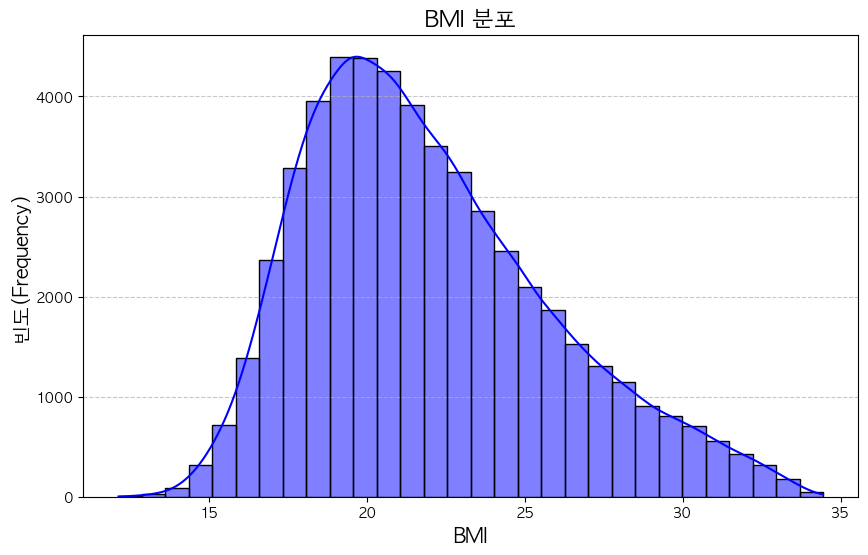

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_21920/3474187108.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='하루30분이상운동', palette='coolwarm')


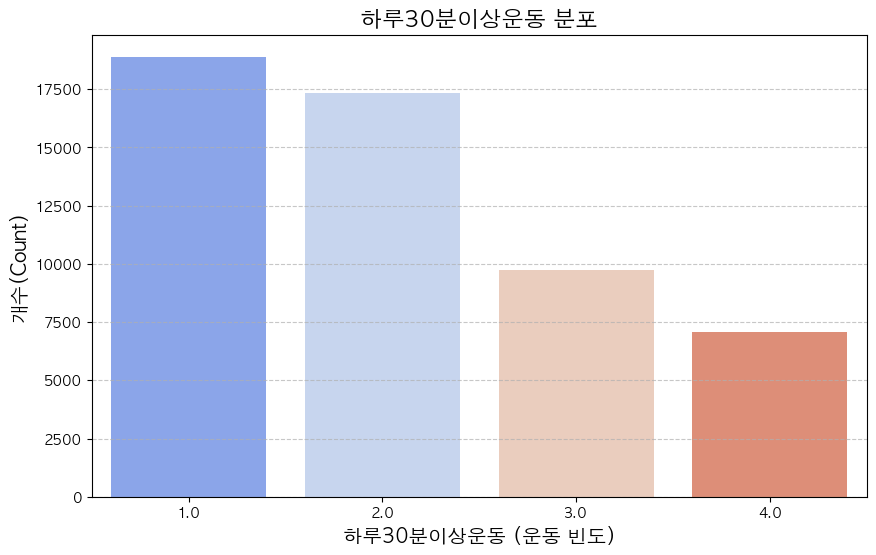

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')  
plt.rcParams['axes.unicode_minus'] = False 

# BMI 분포 시각화
# histogram으로 bmi의 전체 데이터 확인 
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['BMI'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('BMI 분포', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('빈도(Frequency)', fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 하루30분이상운동 분포 시각화
# 범주형 데이터여서 각 그룹에 따른 bar plot으로 분포확인
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='하루30분이상운동', palette='coolwarm')
plt.title('하루30분이상운동 분포', fontsize=16)
plt.xlabel('하루30분이상운동 (운동 빈도)', fontsize=14)
plt.ylabel('개수(Count)', fontsize=14) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [28]:
# '하루30분이상운동' 값 분포 확인
print(cleaned_data['하루30분이상운동'].value_counts())

# 그룹별 BMI 평균
grouped_bmi = cleaned_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n하루30분이상운동 여부별 BMI 평균:")
print(grouped_bmi)

하루30분이상운동
1.0    18895
2.0    17341
3.0     9729
4.0     7073
Name: count, dtype: int64

하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.563718
2.0    22.048529
3.0    22.276375
4.0    22.342176
Name: BMI, dtype: float64


In [30]:
#BMI와 30분 운동의 관계를 알아보기 위해 중 고등학교 데이터로 나눠본 것과 안나눈 것을 확인함

# 중학교 데이터 필터링
middle_school_data = cleaned_data[cleaned_data['학교급'] == '중']

# 고등학교 데이터 필터링
high_school_data = cleaned_data[cleaned_data['학교급'] == '고']

# 중학교: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[중학교] '하루30분이상운동' 값 분포:")
print(middle_school_data['하루30분이상운동'].value_counts())

middle_grouped_bmi = middle_school_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[중학교] 하루30분이상운동 여부별 BMI 평균:")
print(middle_grouped_bmi)

# 고등학교: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[고등학교] '하루30분이상운동' 값 분포:")
print(high_school_data['하루30분이상운동'].value_counts())

high_grouped_bmi = high_school_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[고등학교] 하루30분이상운동 여부별 BMI 평균:")
print(high_grouped_bmi)



[중학교] '하루30분이상운동' 값 분포:
하루30분이상운동
2.0    8183
1.0    7688
3.0    5688
4.0    4050
Name: count, dtype: int64

[중학교] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    20.993595
2.0    21.453526
3.0    21.860557
4.0    21.867904
Name: BMI, dtype: float64

[고등학교] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    11203
2.0     9153
3.0     4041
4.0     3023
Name: count, dtype: int64

[고등학교] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.953786
2.0    22.580364
3.0    22.861668
4.0    22.977572
Name: BMI, dtype: float64


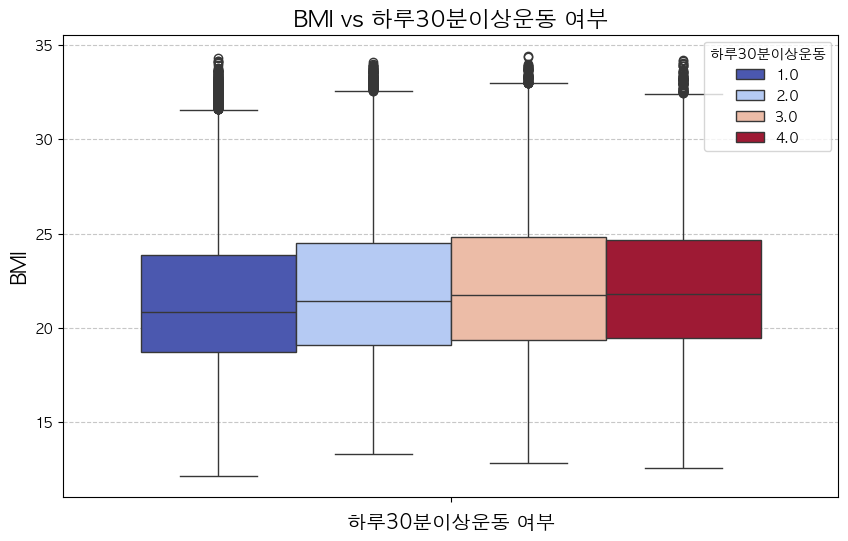

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('BMI vs 하루30분이상운동 여부', fontsize=16)
plt.xlabel('하루30분이상운동 여부', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

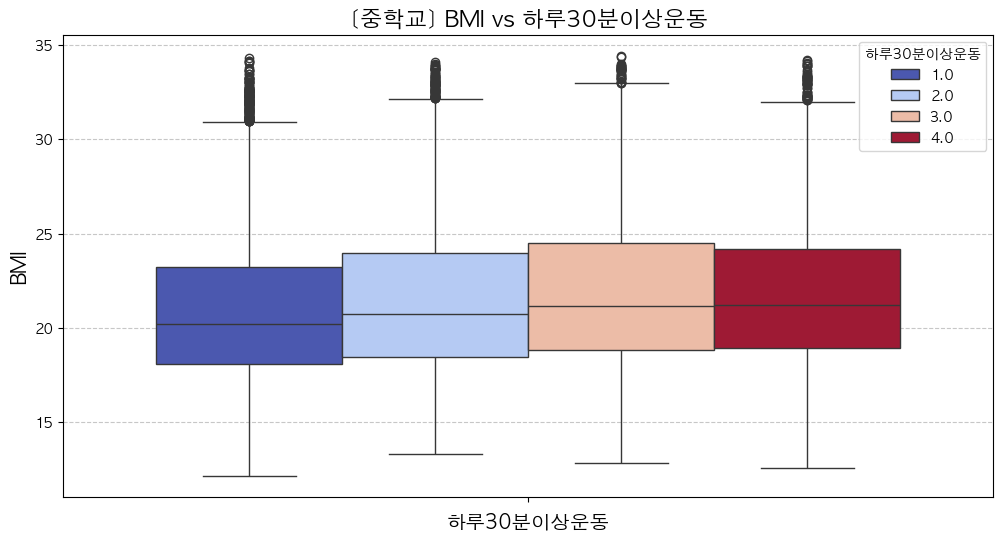

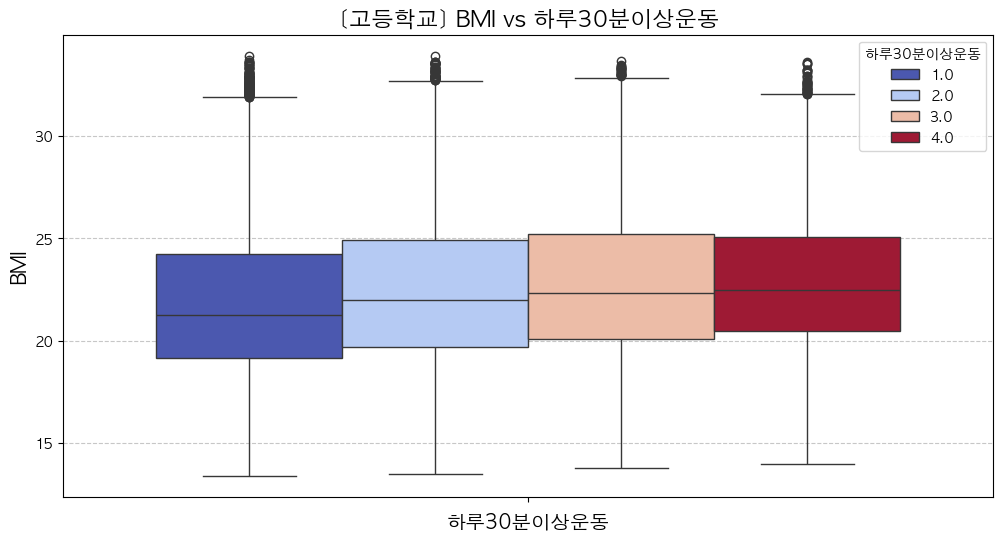

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#분포에서 큰 차이가 없는 것으로 보여 중고등학교가 합쳐진 데이터로 진행

# 중학교 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=middle_school_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('[중학교] BMI vs 하루30분이상운동', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 고등학교 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_school_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('[고등학교] BMI vs 하루30분이상운동', fontsize=16)
plt.xlabel('하루30분이상운동', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 여자보다 남자의 BMI가 평균적으로 더 높게 나타나는 경향이 있어, 분석의 정확성을 높이기 위해 성별에 따른 BMI의 차이를 분리하여 분석을 진행하였습니다. 이를 통해 성별이 혼란 변수(confounding variable)로 작용하는 영향을 최소화하고자 하였습니다 

In [32]:
# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']

# 전체 데이터: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[전체 데이터] '하루30분이상운동' 값 분포:")
print(cleaned_data['하루30분이상운동'].value_counts())

grouped_bmi = cleaned_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[전체 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(grouped_bmi)

# 남학생 데이터
print("\n[남학생 데이터] '하루30분이상운동' 값 분포:")
print(male_data['하루30분이상운동'].value_counts())

male_grouped_bmi = male_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[남학생 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(male_grouped_bmi)

# 여학생 데이터
print("\n[여학생 데이터] '하루30분이상운동' 값 분포:")
print(female_data['하루30분이상운동'].value_counts())

female_grouped_bmi = female_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[여학생 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(female_grouped_bmi)



[전체 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    18895
2.0    17341
3.0     9729
4.0     7073
Name: count, dtype: int64

[전체 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.563718
2.0    22.048529
3.0    22.276375
4.0    22.342176
Name: BMI, dtype: float64

[남학생 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
2.0    8669
1.0    6820
3.0    6183
4.0    5296
Name: count, dtype: int64

[남학생 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    22.537619
2.0    22.635339
3.0    22.679659
4.0    22.603967
Name: BMI, dtype: float64

[여학생 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    12075
2.0     8672
3.0     3546
4.0     1777
Name: count, dtype: int64

[여학생 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.013655
2.0    21.461923
3.0    21.573187
4.0    21.561958
Name: BMI, dtype: float64


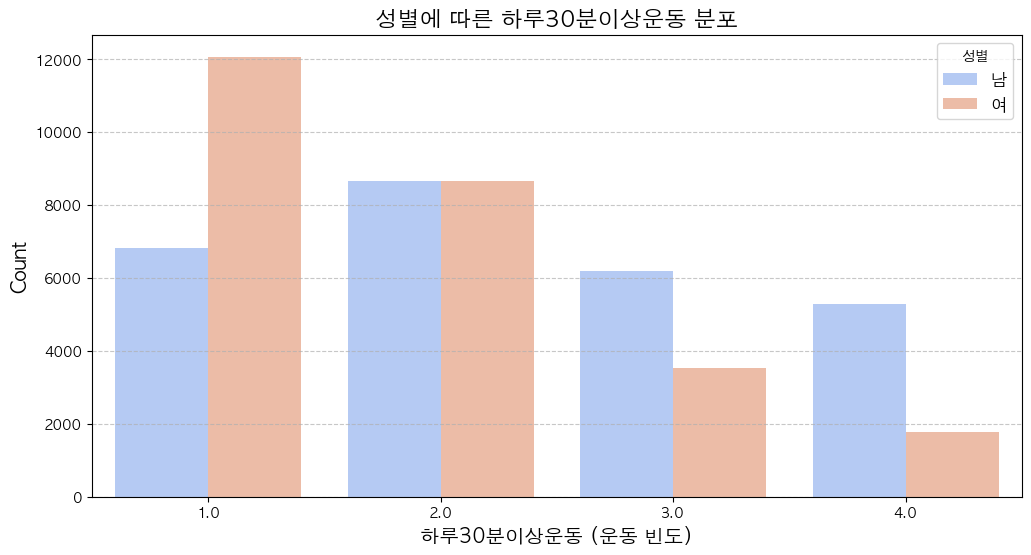

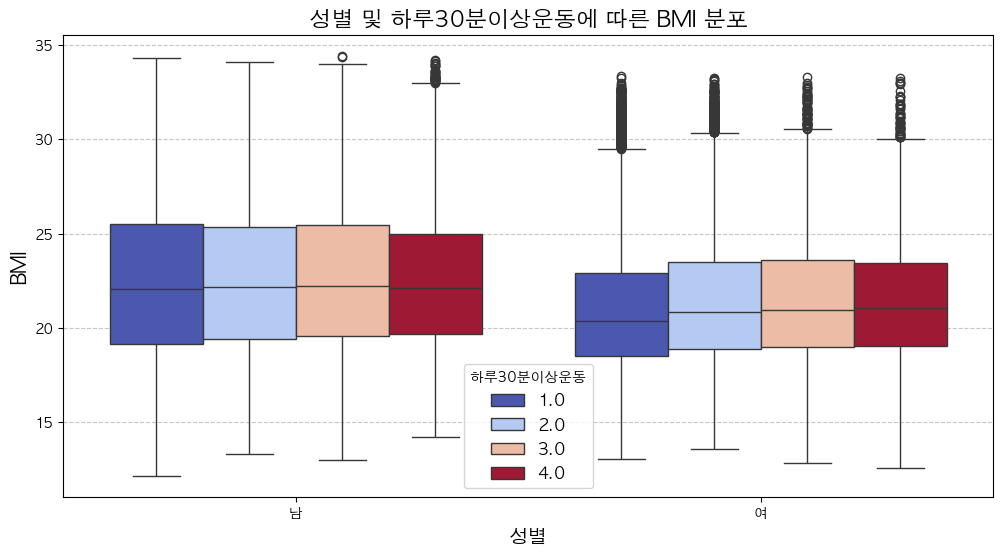

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


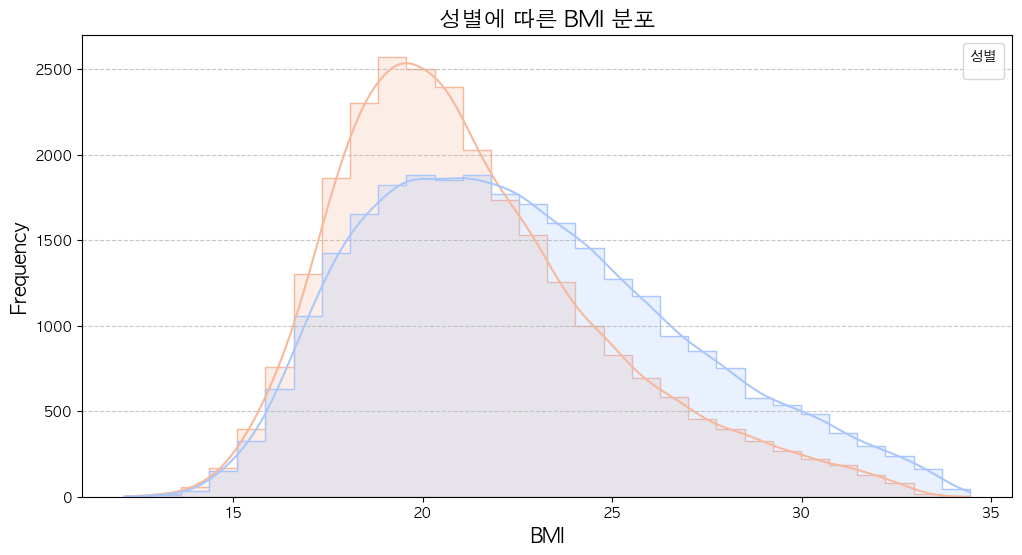

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 성별에 따른 '하루30분이상운동' 값 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_data, x='하루30분이상운동', hue='성별', palette='coolwarm')
plt.title('성별에 따른 하루30분이상운동 분포', fontsize=16)
plt.xlabel('하루30분이상운동 (운동 빈도)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 성별에 따른 BMI 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x='성별', y='BMI', hue='하루30분이상운동', palette='coolwarm')
plt.title('성별 및 하루30분이상운동에 따른 BMI 분포', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='하루30분이상운동', fontsize=12)
plt.show()

# 성별에 따른 BMI 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(data=cleaned_data, x='BMI', hue='성별', kde=True, bins=30, palette='coolwarm', element='step')
plt.title('성별에 따른 BMI 분포', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='성별', fontsize=12)
plt.show()


### 초기 데이터 분석 결과, 남학생과 여학생 간의 BMI와 운동 빈도의 분포가 다르게 나타났습니다. 이는 성별에 따라 BMI와 운동 빈도 사이의 관계가 달라질 가능성이 있을 수 있습니다. 성별에 따른 차이를 확인하기 위해 남학생과 여학생을 각각 독립적으로 분석합니다.